In [5]:
def calculate_N(n):
    return (n + 4) % 5 + 1

N_for_5 = calculate_N(5)

N_for_5

5

In [2]:
import pandas as pd

national_names = pd.read_csv(r"D:/piton/NationalNames.csv")

print(national_names.tail(8))

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


In [26]:
# Виводимо загальну інформацію про DataFrame `national_names`
print(national_names.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 69.6+ MB
None


In [8]:
import pandas as pd

# Завантаження файлу CSV у DataFrame
national_names = pd.read_csv("D:/piton/NationalNames.csv")

# Перевірка даних
print(national_names.head())

# Фільтрація унікальних імен за статтю
female_names = national_names[national_names['Gender'] == 'F']['Name'].nunique()
print(f"Кількість унікальних жіночих імен: {female_names}")

male_names = national_names[national_names['Gender'] == 'M']['Name'].nunique()
print(f"Кількість унікальних чоловічих імен: {male_names}")


   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
Кількість унікальних жіночих імен: 64911
Кількість унікальних чоловічих імен: 39199


In [25]:
# Фільтруємо дані: залишаємо тільки ті рядки, де рік дорівнює 2010 і стать — чоловіча ('M')
top_5_male_names_2010 = (national_names[(national_names['Year'] == 2010) & (national_names['Gender'] == 'M')]
                         # Групуємо дані за колонкою 'Name' (імена)
                         .groupby('Name')['Count'].sum()
                         # Сортуємо імена за зменшенням кількості їх використання
                         .sort_values(ascending=False)
                         # Вибираємо топ-5 найпопулярніших чоловічих імен
                         .head(5))
# Виводимо список топ-5 чоловічих імен за 2010 рік
print(top_5_male_names_2010)


Name
Jacob      22082
Ethan      17985
Michael    17308
Jayden     17152
William    17030
Name: Count, dtype: int64


In [27]:
# Знаходимо мінімальне значення в колонці 'Count'
min_count = national_names['Count'].min()

# Фільтруємо дані, щоб залишити тільки записи, де значення 'Count' дорівнює мінімальному
min_count_records = national_names[national_names['Count'] == min_count].shape[0]

# Виводимо кількість записів із мінімальним значенням 'Count'
print(f"Кількість записів з мінімальним значенням Count: {min_count_records}")


Кількість записів з мінімальним значенням Count: 254615


In [28]:
# Групуємо дані за роками ('Year') і рахуємо кількість унікальних імен ('Name') для кожного року
unique_names_per_year = national_names.groupby('Year')['Name'].nunique()

# Виводимо кількість унікальних імен для кожного року
print(unique_names_per_year)


Year
1880     1889
1881     1830
1882     2012
1883     1962
1884     2158
        ...  
2010    31603
2011    31418
2012    31236
2013    30774
2014    30579
Name: Name, Length: 135, dtype: int64


In [29]:
# Групуємо дані за роками ('Year') і обчислюємо загальну кількість народжень ('Count') для кожного року
total_births_per_year = national_names.groupby('Year')['Count'].sum()

# Виводимо загальну кількість народжень для кожного року
print(total_births_per_year)


Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64


In [30]:
# Знаходимо рік, у якому було зареєстровано найбільшу кількість народжень
max_birth_year = total_births_per_year.idxmax()

# Визначаємо максимальну кількість народжень за рік
max_births = total_births_per_year.max()

# Виводимо результат у вигляді повідомлення з роком і кількістю народжень
print(f"Найбільша кількість народжень була у {max_birth_year} році: {max_births} дітей")


Найбільша кількість народжень була у 1957 році: 4200026 дітей


In [31]:
# Групуємо дані за роком (Year) і статтю (Gender), обчислюючи суму кількості (Count) народжень для кожної комбінації
gender_count_per_year = national_names.groupby(['Year', 'Gender'])['Count'].sum().unstack()

# Виводимо результат: таблицю, де рядки — це роки, а стовпці — статі (Gender) 
print(gender_count_per_year)


Gender        F        M
Year                    
1880      90993   110491
1881      91954   100745
1882     107850   113688
1883     112321   104629
1884     129022   114445
...         ...      ...
2010    1772738  1913851
2011    1753500  1893230
2012    1753922  1889414
2013    1745339  1881463
2014    1768775  1901376

[135 rows x 2 columns]


In [32]:
# Визначаємо кількість років, коли кількість народжень дівчаток (стовпець 'F') була більшою за кількість народжень хлопчиків (стовпець 'M')
years_more_females = gender_count_per_year[gender_count_per_year['F'] > gender_count_per_year['M']].shape[0]

# Виводимо результат: кількість таких років
print(f"Кількість років, коли народжувалося більше дівчаток: {years_more_females}")


Кількість років, коли народжувалося більше дівчаток: 54


In [33]:
# Групуємо дані за ім'ям (Name) і визначаємо кількість унікальних значень у колонці 'Gender' для кожного імені
neutral_names = national_names.groupby('Name')['Gender'].nunique()

# Визначаємо кількість імен, які використовувалися для обох статей (тобто з двома унікальними значеннями 'Gender')
gender_neutral_names_count = neutral_names[neutral_names == 2].shape[0]

# Виводимо результат: кількість гендерно-нейтральних імен
print(f"Кількість гендерно-нейтральних імен: {gender_neutral_names_count}")


Кількість гендерно-нейтральних імен: 10221


In [18]:
# Фільтруємо дані, залишаючи тільки рядки, де ім'я (Name) — 'Barbara' і стать (Gender) — 'M' (хлопчики)
barbara_male_count = national_names[(national_names['Name'] == 'Barbara') & (national_names['Gender'] == 'M')]['Count'].sum()

# Обчислюємо загальну кількість хлопчиків із цим ім'ям та виводимо результат
print(f"Кількість хлопчиків, названих 'Barbara': {barbara_male_count}")


Кількість хлопчиків, названих 'Barbara': 4139


In [19]:
# Визначаємо кількість унікальних років у колонці 'Year' (тобто скільки різних років присутньо в даних)
years_of_observation = national_names['Year'].nunique()

# Виводимо результат: загальну кількість років спостережень
print(f"Кількість років спостережень: {years_of_observation}")


Кількість років спостережень: 135


In [34]:
# Групуємо дані за іменем (Name) та визначаємо кількість унікальних значень у колонці 'Gender' для кожного імені
gender_neutral_names = national_names.groupby('Name')['Gender'].nunique()

# Вибираємо імена, які використовувалися для обох статей (дві унікальні статі 'F' і 'M')
popular_neutral_names = national_names[national_names['Name'].isin(gender_neutral_names[gender_neutral_names == 2].index)]

# Групуємо ці імена за іменем (Name) і роком (Year), обчислюємо суму народжень (Count) за кожну групу
popular_neutral_names_per_year = popular_neutral_names.groupby(['Name', 'Year'])['Count'].sum().unstack().dropna()

# Виводимо отриману таблицю, де рядки — це гендерно-нейтральні імена,
# стовпці — це роки, а значення — це кількість народжень для відповідного імені в певному році
print(popular_neutral_names_per_year)


Year       1880  1881  1882   1883   1884   1885   1886   1887   1888   1889  \
Name                                                                           
Aaron     102.0  94.0  85.0  105.0   97.0   88.0   86.0   78.0   90.0   85.0   
Abbie      71.0  81.0  80.0   79.0   98.0   88.0   84.0  109.0  137.0  107.0   
Abel        9.0  12.0  10.0   12.0   14.0    6.0   16.0   11.0    8.0    9.0   
Abigail    12.0   8.0  14.0   11.0   13.0    9.0   15.0   13.0   18.0   20.0   
Abraham    81.0  86.0  91.0   52.0   67.0   86.0   77.0   75.0   78.0   83.0   
...         ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   
Wilson     72.0  73.0  82.0   67.0   78.0   59.0   71.0   52.0   62.0   44.0   
Winifred   92.0  81.0  88.0  125.0  146.0  120.0  146.0  154.0  176.0  186.0   
Winnie     49.0  84.0  74.0   67.0   99.0   80.0  134.0  114.0  143.0  162.0   
Wyatt      15.0  14.0  12.0    6.0   13.0    9.0   12.0   11.0   16.0   15.0   
Zoe        23.0  22.0  25.0   23.0   31.

In [35]:
# Групуємо дані за іменами (Name) та визначаємо кількість унікальних років (Year), у яких кожне ім'я зустрічалося
name_year_counts = national_names.groupby('Name')['Year'].nunique()

# Вибираємо імена, які з'являлися лише в одному році (тобто непопулярні імена)
unpopular_names = name_year_counts[name_year_counts == 1].index

# Знаходимо ім'я з максимальною кількістю народжень серед таких непопулярних імен
popular_unpopular_name = national_names[national_names['Name'].isin(unpopular_names)].groupby('Name')['Count'].sum().idxmax()

# Виводимо результат: найбільш популярне ім'я серед тих, що з'являлися лише в одному році
print(f"Найпопулярніше серед непопулярних імен: {popular_unpopular_name}")


Найпопулярніше серед непопулярних імен: Christop


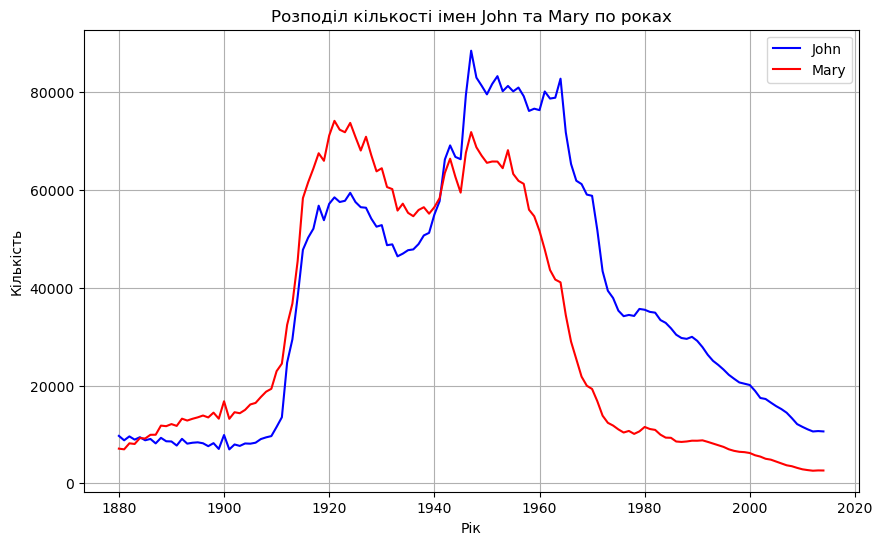

In [22]:
import matplotlib.pyplot as plt

# Фільтруємо дані для імені "John" і групуємо їх за роками, підсумовуючи кількість народжень
john_data = national_names[national_names['Name'] == 'John'].groupby('Year')['Count'].sum()

# Фільтруємо дані для імені "Mary" і групуємо їх за роками, підсумовуючи кількість народжень
mary_data = national_names[national_names['Name'] == 'Mary'].groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 6))
plt.plot(john_data.index, john_data.values, label='John', color='blue')
plt.plot(mary_data.index, mary_data.values, label='Mary', color='red')
plt.title('Розподіл кількості імен John та Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.legend()
plt.grid(True)
plt.savefig('D:/piton/john_mary_distribution.png')
plt.show()


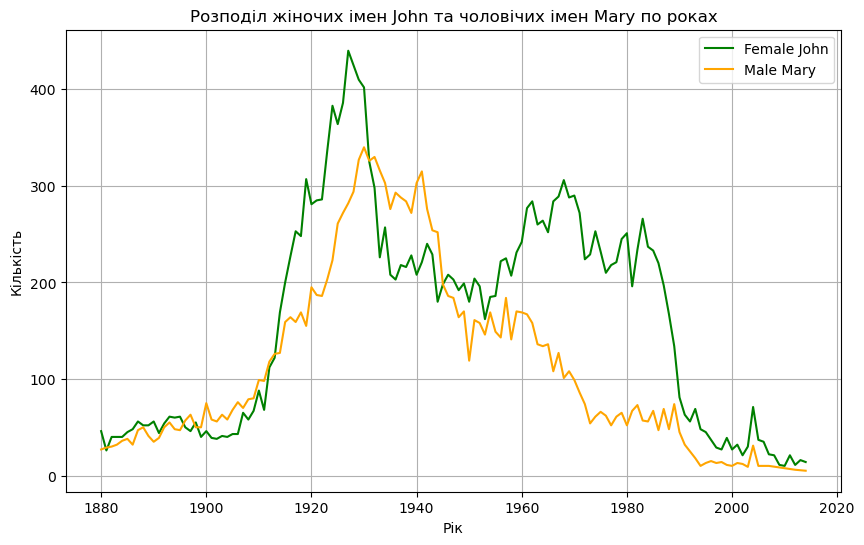

In [23]:
# Фільтруємо дані для жіночого імені "John" і групуємо їх за роками, підсумовуючи кількість народжень
female_john = national_names[(national_names['Name'] == 'John') & (national_names['Gender'] == 'F')].groupby('Year')['Count'].sum()

# Фільтруємо дані для чоловічого імені "Mary" і групуємо їх за роками, підсумовуючи кількість народжень
male_mary = national_names[(national_names['Name'] == 'Mary') & (national_names['Gender'] == 'M')].groupby('Year')['Count'].sum()

plt.figure(figsize=(10, 6))
plt.plot(female_john.index, female_john.values, label='Female John', color='green')
plt.plot(male_mary.index, male_mary.values, label='Male Mary', color='orange')
plt.title('Розподіл жіночих імен John та чоловічих імен Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.legend()
plt.grid(True)
plt.savefig('D:/piton/female_john_male_mary_distribution.png')
plt.show()


In [36]:
# Знаходимо найпопулярніше ім'я для кожного року:
# Спочатку для кожного року за допомогою groupby() та idxmax() знаходимо індекс, що відповідає максимальній кількості народжень
most_popular_names_per_year = national_names.loc[national_names.groupby('Year')['Count'].idxmax()]

# Виводимо найпопулярніші імена для кожного року, разом з роком і кількістю
print(most_popular_names_per_year[['Year', 'Name', 'Count']])


         Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  21147
1792389  2014      Emma  20799

[135 rows x 3 columns]
